In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('train.csv')

In [4]:
data.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
6819,NCP42,8.51,Low Fat,0.016136,Household,195.6478,OUT049,1999,Medium,Tier 1,Supermarket Type1,4262.4516
7990,DRK12,9.50,Low Fat,0.041971,Soft Drinks,33.3900,OUT045,2002,NaN,Tier 2,Supermarket Type1,732.3800
6581,FDW47,NaN,Low Fat,0.081197,Breads,121.7414,OUT019,1985,Small,Tier 1,Grocery Store,365.5242
3919,FDW07,18.00,Regular,0.142570,Fruits and Vegetables,88.2514,OUT013,1987,High,Tier 3,Supermarket Type1,1505.3738
5663,DRE27,11.85,Low Fat,0.132645,Dairy,96.9726,OUT035,2004,Small,Tier 2,Supermarket Type1,1174.4712


In [5]:
data.shape

(8523, 12)

In [7]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
data.isnull()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,False,False,False,False,False,False,False,False,False,False,False,False
8519,False,False,False,False,False,False,False,False,True,False,False,False
8520,False,False,False,False,False,False,False,False,False,False,False,False
8521,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
percent = data.isnull().sum()*100/len(data)

In [11]:
print(percent)

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64


In [12]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [15]:
data.duplicated().any()

False

In [16]:
data['Item_Weight']

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [17]:
data['Outlet_Size']

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

In [18]:
data['Item_Weight']

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [19]:
mean_weight = data['Item_Weight'].mean()

In [20]:
median_weight = data['Item_Weight'].median()

In [21]:
print(mean_weight,median_weight)

12.857645184135976 12.6


In [22]:
data['Item_Weight_mean']=data['Item_Weight'].fillna(mean_weight)

In [23]:
data['Item_Weight_median']=data['Item_Weight'].fillna(median_weight)

In [24]:
data.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_mean,Item_Weight_median
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,9.30
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92,5.92
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,17.50
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,19.20,19.20
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93,8.93


In [25]:
print("Intial Weight Variance",data['Item_Weight'].var())
print("Variance post mean imputation",data['Item_Weight_mean'].var())
print("Variance post median imputation",data['Item_Weight_median'].var())

Intial Weight Variance 21.56168825983637
Variance post mean imputation 17.860121735060453
Variance post median imputation 17.869561454073366


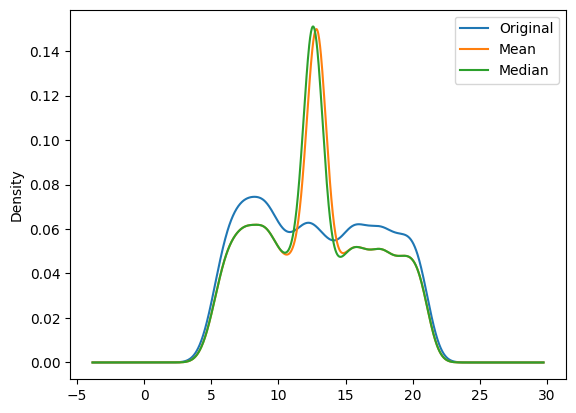

In [26]:
data['Item_Weight'].plot(kind = "kde",label="Original")

data['Item_Weight_mean'].plot(kind = "kde",label = "Mean")

data['Item_Weight_median'].plot(kind = "kde",label = "Median")

plt.legend()
plt.show()

<Axes: >

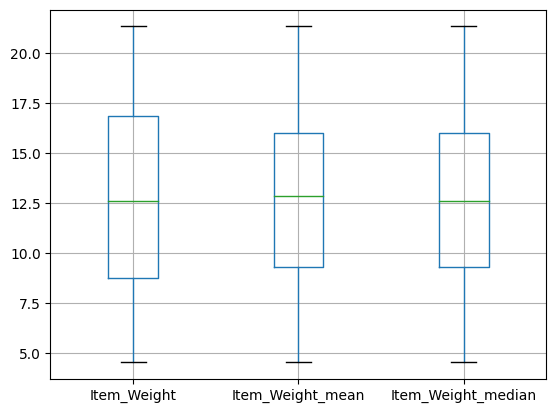

In [35]:
data[['Item_Weight','Item_Weight_mean','Item_Weight_median']].boxplot()

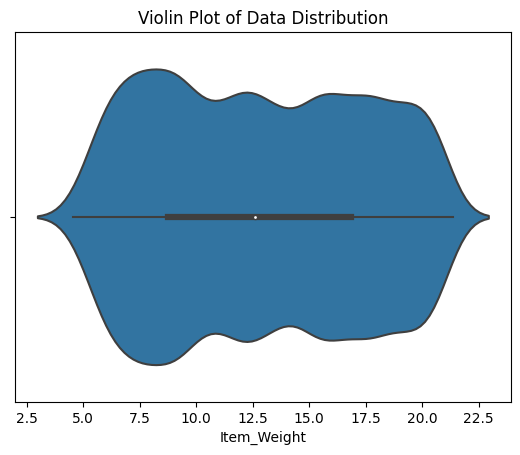

In [36]:
sns.violinplot(x='Item_Weight', data=data)

plt.title('Violin Plot of Data Distribution')

plt.show()

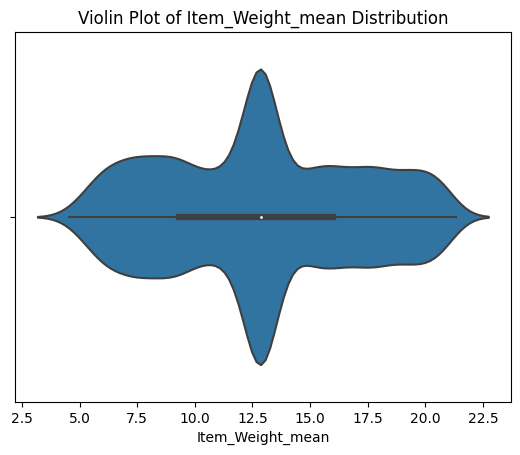

In [37]:
sns.violinplot(x='Item_Weight_mean', data=data)

plt.title('Violin Plot of Item_Weight_mean Distribution')

plt.show()

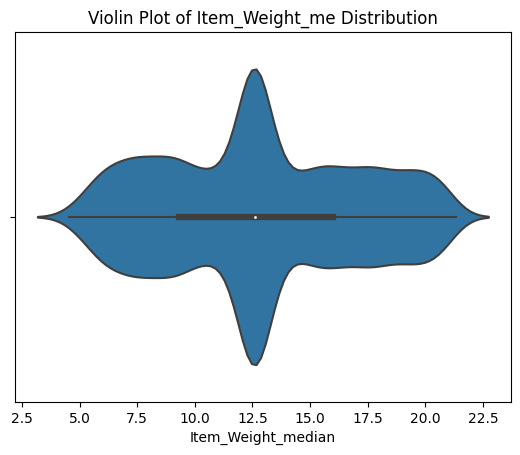

In [38]:
sns.violinplot(x='Item_Weight_median', data=data)

plt.title('Violin Plot of Item_Weight_me Distribution')

plt.show()

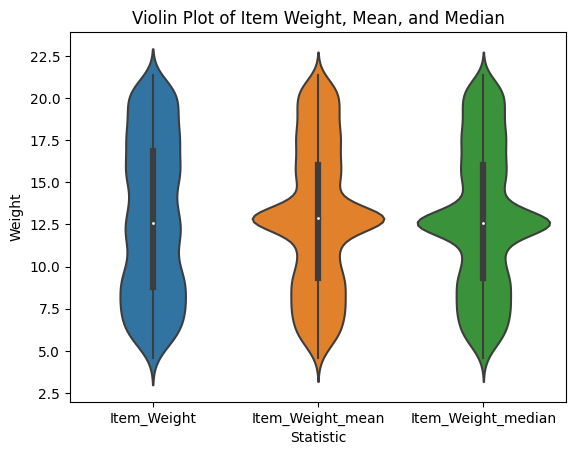

In [40]:
concatenated_data = pd.concat([data['Item_Weight'], data['Item_Weight_mean'], data['Item_Weight_median']], axis=1)
concatenated_data.columns = ['Item_Weight', 'Item_Weight_mean', 'Item_Weight_median']


melted_data = concatenated_data.melt(var_name='Statistic', value_name='Weight')


sns.violinplot(x='Statistic', y='Weight', data=melted_data)


plt.xlabel('Statistic')
plt.ylabel('Weight')
plt.title('Violin Plot of Item Weight, Mean, and Median')


plt.show()

In [41]:
data['Item_Weight_interploate']=data['Item_Weight'].interpolate(method="linear")

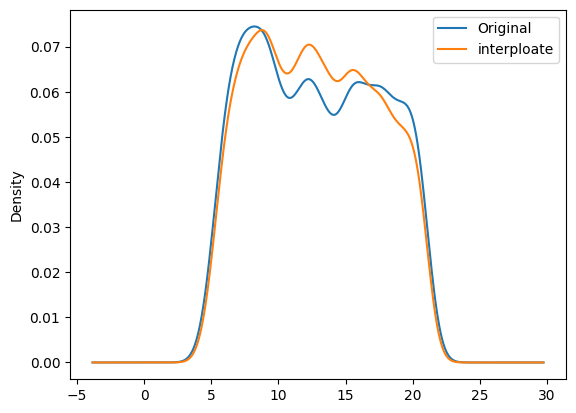

In [42]:
data['Item_Weight'].plot(kind = "kde",label="Original")

data['Item_Weight_interploate'].plot(kind = "kde",label = "interploate")

plt.legend()
plt.show()

In [43]:
from sklearn.impute import KNNImputer

In [44]:
knn = KNNImputer(n_neighbors=10,weights="distance")

In [45]:
data['knn_imputer']= knn.fit_transform(data[['Item_Weight']]).ravel()

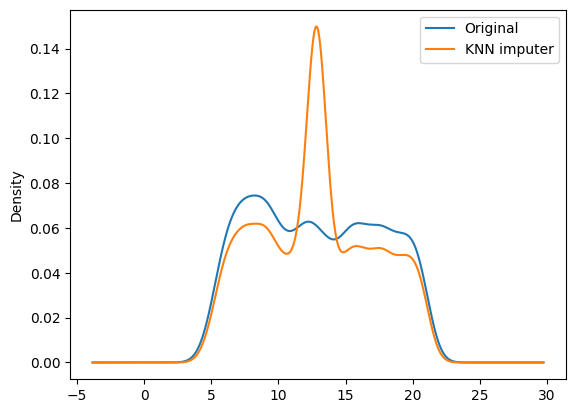

In [46]:
data['Item_Weight'].plot(kind = "kde",label="Original")

data['knn_imputer'].plot(kind = "kde",label = "KNN imputer")

plt.legend()
plt.show()

In [47]:
knn_2 = KNNImputer(n_neighbors=20,weights="distance")

In [48]:
data['knn_2_imputer']= knn.fit_transform(data[['Item_Weight']]).ravel()

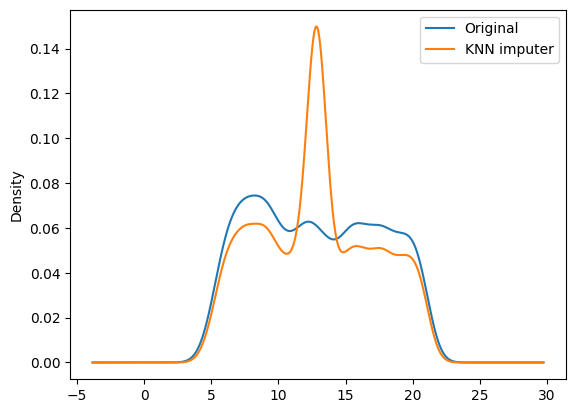

In [49]:
data['Item_Weight'].plot(kind = "kde",label="Original")

data['knn_2_imputer'].plot(kind = "kde",label = "KNN imputer")

plt.legend()
plt.show()

In [55]:
data = data.drop(['Item_Weight','Item_Weight_mean','Item_Weight_median','knn_imputer','knn_2_imputer'],axis=1)

In [56]:
data.head(5)

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interploate
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,19.20
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93


In [58]:
data.isnull()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interploate
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,False,False,False,False,False,False,False,False,False,False,False,False
8519,False,False,False,False,False,False,False,True,False,False,False,False
8520,False,False,False,False,False,False,False,False,False,False,False,False
8521,False,False,False,False,False,False,False,False,False,False,False,False


In [59]:
data.isnull().sum()

Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Weight_interploate         0
dtype: int64

In [60]:
data['Outlet_Size']

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

In [63]:
data['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [62]:
data['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [64]:
mode_outlet = data.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x:x.mode()[0]))

In [65]:
mode_outlet

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [70]:
missing_values = data['Outlet_Size'].isnull()
missing_values

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [72]:
data.loc[missing_values,'Outlet_Size'] = data.loc[missing_values,'Outlet_Type'].apply(lambda x :mode_outlet[x])

In [73]:
data.isnull().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Item_Weight_interploate      0
dtype: int64

In [74]:
data.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales', 'Item_Weight_interploate'],
      dtype='object')

In [75]:
data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [76]:
data.replace({'Item_Fat_Content':{'Low Fat':'LF','low fat':'LF','reg':'Regular'}},inplace=True)

In [77]:
data['Item_Fat_Content'].value_counts()

LF         5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [79]:
data['Item_Visibility']

0       0.016047
1       0.019278
2       0.016760
3       0.000000
4       0.000000
          ...   
8518    0.056783
8519    0.046982
8520    0.035186
8521    0.145221
8522    0.044878
Name: Item_Visibility, Length: 8523, dtype: float64

In [80]:
data['Item_Visibility'].value_counts()

0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64

In [82]:
data['Item_Visibility_interpolate']=data['Item_Visibility'].replace(0,np.nan).interpolate(method='linear')

In [83]:
data.head(5)

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interploate,Item_Visibility_interpolate
0,FDA15,LF,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,0.016047
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92,0.019278
2,FDN15,LF,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,0.016760
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,19.20,0.015755
4,NCD19,LF,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93,0.014751


In [84]:
data['Item_Visibility_interpolate'].value_counts()

0.076975    3
0.044024    2
0.040912    2
0.076856    2
0.078759    2
           ..
0.021011    1
0.099189    1
0.076866    1
0.014116    1
0.044878    1
Name: Item_Visibility_interpolate, Length: 8405, dtype: int64

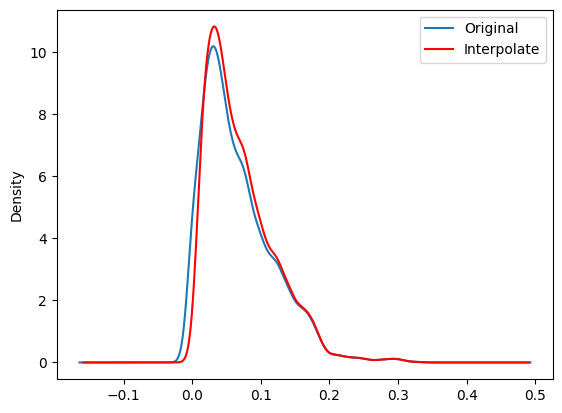

In [85]:
data['Item_Visibility'].plot(kind="kde",label="Original")

data['Item_Visibility_interpolate'].plot(kind="kde",color='red',label="Interpolate")

plt.legend()
plt.show()

In [86]:
data = data.drop('Item_Visibility',axis=1)

In [87]:
data.head(1)

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interploate,Item_Visibility_interpolate
0,FDA15,LF,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,9.3,0.016047


In [88]:
data['Item_Type']

0                       Dairy
1                 Soft Drinks
2                        Meat
3       Fruits and Vegetables
4                   Household
                ...          
8518              Snack Foods
8519             Baking Goods
8520       Health and Hygiene
8521              Snack Foods
8522              Soft Drinks
Name: Item_Type, Length: 8523, dtype: object

In [89]:
data['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [90]:
data['Item_Identifier']

0       FDA15
1       DRC01
2       FDN15
3       FDX07
4       NCD19
        ...  
8518    FDF22
8519    FDS36
8520    NCJ29
8521    FDN46
8522    DRG01
Name: Item_Identifier, Length: 8523, dtype: object

In [91]:
data['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [92]:
data['Item_Identifier'].value_counts().sample(5)

FDV35    4
NCY41    7
FDO56    5
FDM56    5
FDP51    3
Name: Item_Identifier, dtype: int64

In [93]:
data['Item_Identifier'] =data['Item_Identifier'].apply(lambda x : x[:2])

In [94]:
data['Item_Identifier']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: Item_Identifier, Length: 8523, dtype: object

In [95]:
data['Item_Identifier'].value_counts()

FD    6125
NC    1599
DR     799
Name: Item_Identifier, dtype: int64

In [96]:
data['Outlet_Establishment_Year']

0       1999
1       2009
2       1999
3       1998
4       1987
        ... 
8518    1987
8519    2002
8520    2004
8521    2009
8522    1997
Name: Outlet_Establishment_Year, Length: 8523, dtype: int64

In [97]:
import datetime as dt

In [98]:
current_year = dt.datetime.today().year
current_year

2024

In [99]:
data['Outlet_age']= current_year - data['Outlet_Establishment_Year']
data.head(5)

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interploate,Item_Visibility_interpolate,Outlet_age
0,FD,LF,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,0.016047,25
1,DR,Regular,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92,0.019278,15
2,FD,LF,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,0.016760,25
3,FD,Regular,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,19.20,0.015755,26
4,NC,LF,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93,0.014751,37


In [100]:
data = data.drop('Outlet_Establishment_Year',axis=1)

In [101]:
data.head(5)

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interploate,Item_Visibility_interpolate,Outlet_age
0,FD,LF,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,9.30,0.016047,25
1,DR,Regular,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,5.92,0.019278,15
2,FD,LF,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,17.50,0.016760,25
3,FD,Regular,Fruits and Vegetables,182.0950,OUT010,Small,Tier 3,Grocery Store,732.3800,19.20,0.015755,26
4,NC,LF,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,8.93,0.014751,37


In [102]:
from sklearn.preprocessing import OrdinalEncoder

In [103]:
data_encoded = data.copy()

In [104]:
cat_cols = data.select_dtypes(include=['object']).columns

In [115]:
for col in cat_cols:
    oe = OrdinalEncoder()
    data_encoded[col] = oe.fit_transform(data_encoded[[col]])

In [116]:
data_encoded.head(5)

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_interploate,Item_Visibility_interpolate,Outlet_age
0,1.0,0.0,4.0,249.8092,9.0,1.0,0.0,1.0,3735.1380,9.30,0.016047,25
1,0.0,1.0,14.0,48.2692,3.0,1.0,2.0,2.0,443.4228,5.92,0.019278,15
2,1.0,0.0,10.0,141.6180,9.0,1.0,0.0,1.0,2097.2700,17.50,0.016760,25
3,1.0,1.0,6.0,182.0950,0.0,2.0,2.0,0.0,732.3800,19.20,0.015755,26
4,2.0,0.0,9.0,53.8614,1.0,0.0,2.0,1.0,994.7052,8.93,0.014751,37


In [118]:
X = data_encoded.drop('Item_Outlet_Sales',axis=1)
X

,Item_Identifier,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Weight_interploate,Item_Visibility_interpolate,Outlet_age
0,1.0,0.0,4.0,249.8092,9.0,1.0,0.0,1.0,9.300,0.016047,25
1,0.0,1.0,14.0,48.2692,3.0,1.0,2.0,2.0,5.920,0.019278,15
2,1.0,0.0,10.0,141.6180,9.0,1.0,0.0,1.0,17.500,0.016760,25
3,1.0,1.0,6.0,182.0950,0.0,2.0,2.0,0.0,19.200,0.015755,26
4,2.0,0.0,9.0,53.8614,1.0,0.0,2.0,1.0,8.930,0.014751,37
...,...,...,...,...,...,...,...,...,...,...,...
8518,1.0,0.0,13.0,214.5218,1.0,0.0,2.0,1.0,6.865,0.056783,37
8519,1.0,1.0,0.0,108.1570,7.0,2.0,1.0,1.0,8.380,0.046982,22
8520,2.0,0.0,8.0,85.1224,6.0,2.0,1.0,1.0,10.600,0.035186,20
8521,1.0,1.0,13.0,103.1332,3.0,1.0,2.0,2.0,7.210,0.145221,15


In [120]:
y = data_encoded['Item_Outlet_Sales']
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [122]:
#Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100,random_state=42)
scores = cross_val_score(rf,X,y,cv=5,scoring='r2')
print(scores.mean())


0.5549992903957147


In [126]:
pip install xgboost

     ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
     ---------------------------------------- 0.1/99.8 MB 1.2 MB/s eta 0:01:27
     ---------------------------------------- 0.1/99.8 MB 1.2 MB/s eta 0:01:22
     ---------------------------------------- 0.4/99.8 MB 2.5 MB/s eta 0:00:41
     ---------------------------------------- 0.6/99.8 MB 3.2 MB/s eta 0:00:32
     ---------------------------------------- 0.8/99.8 MB 3.5 MB/s eta 0:00:29
     ---------------------------------------- 1.1/99.8 MB 4.1 MB/s eta 0:00:24
      --------------------------------------- 1.4/99.8 MB 4.4 MB/s eta 0:00:23
      --------------------------------------- 1.7/99.8 MB 4.9 MB/s eta 0:00:21
      --------------------------------------- 2.0/99.8 MB 5.1 MB/s eta 0:00:20
      --------------------------------------- 2.5/99.8 MB 5.8 MB/s eta 0:00:17
     - -------------------------------------- 2.9/99.8 MB 6.3 MB/s

In [127]:
from xgboost import XGBRFRegressor

xg = XGBRFRegressor(n_estimators=100,random_state=42)
scores = cross_val_score(xg,X,y,cv=5,scoring='r2')
print(scores.mean())

0.5954067732342189


In [128]:
#Feature Importance for XGBRF as XGBRF >>> Random Forest
xg = XGBRFRegressor(n_estimators=100,random_state=42)

xg1 = xg.fit(X,y)
pd.DataFrame({
    'feature':X.columns,
    'XGBRF_importance':xg1.feature_importances_
    
}).sort_values(by='XGBRF_importance',ascending=False)

,feature,XGBRF_importance
7,Outlet_Type,0.349864
5,Outlet_Size,0.192658
10,Outlet_age,0.175040
3,Item_MRP,0.131012
4,Outlet_Identifier,0.130735
6,Outlet_Location_Type,0.013184
9,Item_Visibility_interpolate,0.002493
8,Item_Weight_interploate,0.001770
2,Item_Type,0.001566
0,Item_Identifier,0.000999


In [129]:
['Item_Visibility_interpolate','Item_Weight_interploate',
'Item_Type','Outlet_Location_Type','Item_Identifier','Item_Fat_Content']

['Item_Visibility_interpolate',
 'Item_Weight_interploate',
 'Item_Type',
 'Outlet_Location_Type',
 'Item_Identifier',
 'Item_Fat_Content']

In [130]:
from xgboost import XGBRFRegressor

xg = XGBRFRegressor(n_estimators=100,random_state=42)
scores = cross_val_score(xg1,X.drop(['Item_Visibility_interpolate','Item_Weight_interploate',
'Item_Type','Outlet_Location_Type','Item_Identifier','Item_Fat_Content'],axis=1),y,cv=5,scoring='r2')
print(scores.mean())

0.5966037632320667


In [131]:
final_data = X.drop(columns=['Item_Visibility_interpolate','Item_Weight_interploate',
'Item_Type','Outlet_Location_Type','Item_Identifier','Item_Fat_Content'],axis=1)

In [132]:
final_data

,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Type,Outlet_age
0,249.8092,9.0,1.0,1.0,25
1,48.2692,3.0,1.0,2.0,15
2,141.6180,9.0,1.0,1.0,25
3,182.0950,0.0,2.0,0.0,26
4,53.8614,1.0,0.0,1.0,37
...,...,...,...,...,...
8518,214.5218,1.0,0.0,1.0,37
8519,108.1570,7.0,2.0,1.0,22
8520,85.1224,6.0,2.0,1.0,20
8521,103.1332,3.0,1.0,2.0,15


In [134]:
final_data.head(5)

,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Type,Outlet_age
0,249.8092,9.0,1.0,1.0,25
1,48.2692,3.0,1.0,2.0,15
2,141.6180,9.0,1.0,1.0,25
3,182.0950,0.0,2.0,0.0,26
4,53.8614,1.0,0.0,1.0,37


In [135]:
#Final XGBRF model as more accurate
from xgboost import XGBRFRegressor

In [137]:
xg_final = XGBRFRegressor()

In [138]:
xg_final.fit(final_data,y)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [139]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [140]:
X_train,X_test,y_train,y_test = train_test_split(final_data,y,test_size=0.20,random_state=42)

In [141]:
xg_final.fit(X_train,y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [142]:
y_pred = xg_final.predict(X_test)

In [143]:
mean_absolute_error(y_test,y_pred)

713.9516489619299

In [144]:
#Unseen Data
pred = xg_final.predict(np.array([[85.1224,9.0,1.0,1.0,21]]))[0]
print(pred)

1428.036


In [145]:
print(f"Sales Value is between {pred-714.42} and {pred+714.42}")

Sales Value is between 713.6160107421875 and 2142.4560107421876


In [146]:
import joblib

In [147]:
joblib.dump(xg_final,'bigmart_sales_pred_model')

['bigmart_sales_pred_model']

In [148]:
model = joblib.load('bigmart_sales_pred_model')

In [149]:
pred = model.predict(np.array([[85.1224,9.0,1.0,1.0,21]]))[0]
print(pred)

print(f"Sales Value is between {pred-714.42} and {pred+714.42}")

1428.036
Sales Value is between 713.6160107421875 and 2142.4560107421876


In [150]:
pred = model.predict(np.array([[141.6180,9.0,1.0,1.0,24]]))[0]
print(pred)

print(f"Sales Value is between {pred-714.42} and {pred+714.42}")

2067.0864
Sales Value is between 1352.66642578125 and 2781.50642578125
